### LES Imports

In [2]:
!pip install --upgrade matplotlib

  Obtaining dependency information for matplotlib from https://files.pythonhosted.org/packages/a1/27/8a807464b0cf47fdf3ba8cbb542d4f3a551da0254d7588667857f8a8a88a/matplotlib-3.8.3-cp311-cp311-win_amd64.whl.metadata
  Using cached matplotlib-3.8.3-cp311-cp311-win_amd64.whl.metadata (5.9 kB)
Using cached matplotlib-3.8.3-cp311-cp311-win_amd64.whl (7.6 MB)


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import recall_score, confusion_matrix, precision_score, f1_score, accuracy_score, classification_report

from sklearn.ensemble import VotingClassifier

### 1.Affichage et interpretation de données

In [12]:
# Chargez le fichier CSV dans un DataFrame
data = pd.read_csv("data.csv")
data.info()
data.head()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


#### Description des colonnes :
Le jeu de données comporte 7043 entrées, chacune représentant un client.
Il y a 21 colonnes (ou variables) dans le jeu de données.
La plupart des colonnes sont de type object, ce qui suggère qu'elles contiennent des données textuelles (par exemple, des chaînes de caractères).
Les trois colonnes restantes sont de type numérique : SeniorCitizen, tenure et MonthlyCharges.


on a la colonne "Total Charges" doit etre float 

In [13]:
# Convertir la colonne "TotalCharges" en float
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')
numeric_columns = data.select_dtypes(include=[np.number]).columns

In [4]:
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [5]:
for i in data.columns:
    print(i, ": ", data[i].unique())

customerID :  ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender :  ['Female' 'Male']
SeniorCitizen :  [0 1]
Partner :  ['Yes' 'No']
Dependents :  ['No' 'Yes']
tenure :  [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService :  ['No' 'Yes']
MultipleLines :  ['No phone service' 'No' 'Yes']
InternetService :  ['DSL' 'Fiber optic' 'No']
OnlineSecurity :  ['No' 'Yes' 'No internet service']
OnlineBackup :  ['Yes' 'No' 'No internet service']
DeviceProtection :  ['No' 'Yes' 'No internet service']
TechSupport :  ['No' 'Yes' 'No internet service']
StreamingTV :  ['No' 'Yes' 'No internet service']
StreamingMovies :  ['No' 'Yes' 'No internet service']
Contract :  ['Month-to-month' 'One year' 'Two year']
PaperlessBilling :  ['Yes' 'No']
PaymentMethod :  ['Electronic check' 'Mail

### 2.Visualisation

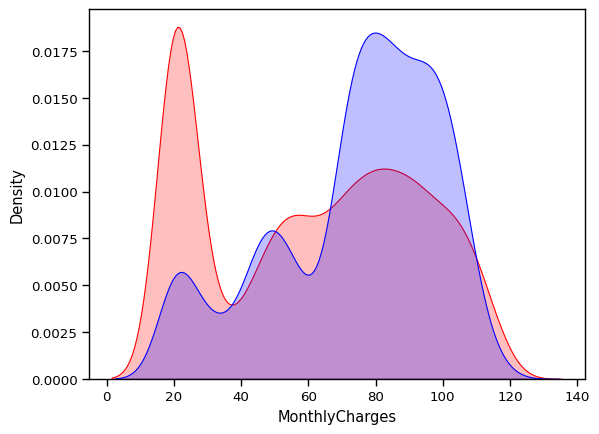

In [14]:
# Visualisation : Distribution des charges mensuelles en fonction du churn
sns.set_context("paper", font_scale=1.1)
ax = sns.kdeplot(data.MonthlyCharges[(data["Churn"] == 'No')],
                 color="Red", fill=True)
ax = sns.kdeplot(data.MonthlyCharges[(data["Churn"] == 'Yes')],
                 ax=ax, color="Blue", fill=True)

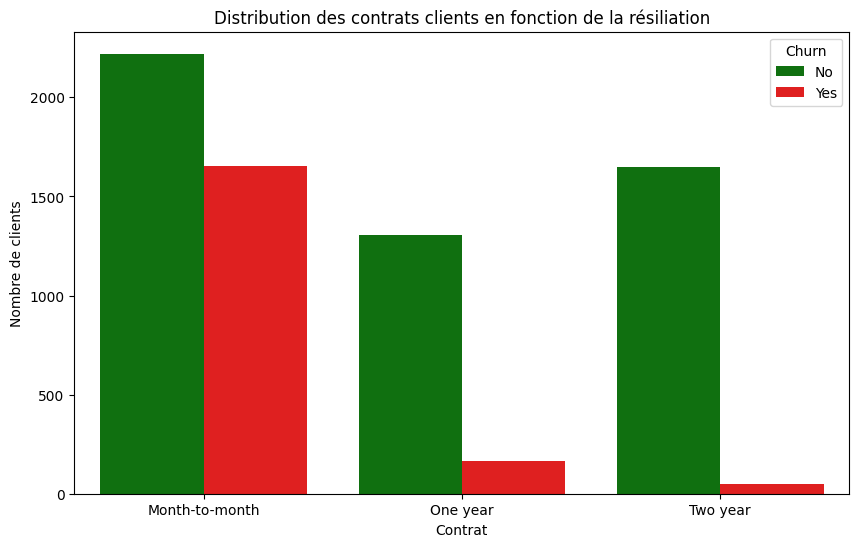

In [5]:
# Définir les couleurs pour les catégories "Churn"
colors = {'No': 'green', 'Yes': 'red'}

# Créer un graphique à barres empilées pour la distribution des contrats en fonction de "Churn"
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='Contract', hue='Churn', palette=colors)

# Ajouter des labels et un titre
plt.title('Distribution des contrats clients en fonction de la résiliation')
plt.xlabel('Contrat')
plt.ylabel('Nombre de clients')

# Afficher la légende
plt.legend(title='Churn', loc='upper right')

# Afficher le graphique
plt.show()

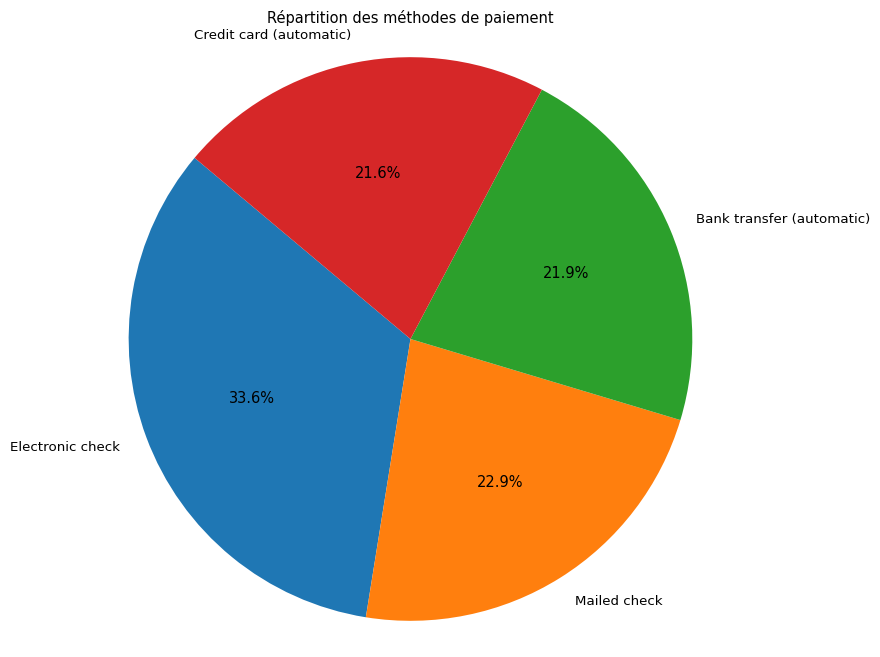

In [15]:
# Calculer les effectifs pour chaque méthode de paiement
payment_counts = data['PaymentMethod'].value_counts()

# Créer un diagramme circulaire
plt.figure(figsize=(8, 8))
plt.pie(payment_counts, labels=payment_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Répartition des méthodes de paiement')
plt.axis('equal')  # Assure que le diagramme circulaire est dessiné comme un cercle
plt.show()


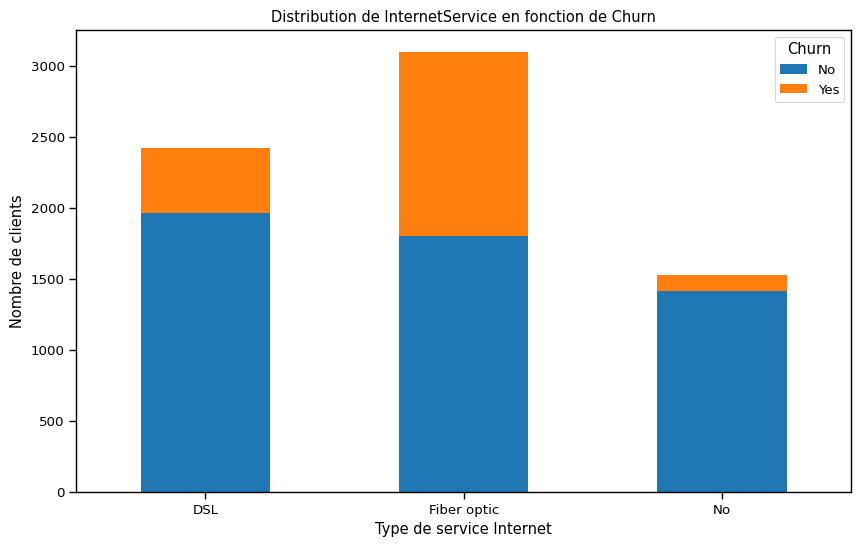

In [16]:
# Calculer les effectifs pour chaque catégorie de "InternetService" en fonction de "Churn"
internet_churn_counts = data.groupby(['InternetService', 'Churn']).size().unstack()

# Créer un graphique à barres empilées
internet_churn_counts.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Distribution de InternetService en fonction de Churn')
plt.xlabel('Type de service Internet')
plt.ylabel('Nombre de clients')
plt.xticks(rotation=0)  # Rotation des étiquettes de l'axe x pour une meilleure lisibilité
plt.legend(title='Churn', loc='upper right')
plt.show()


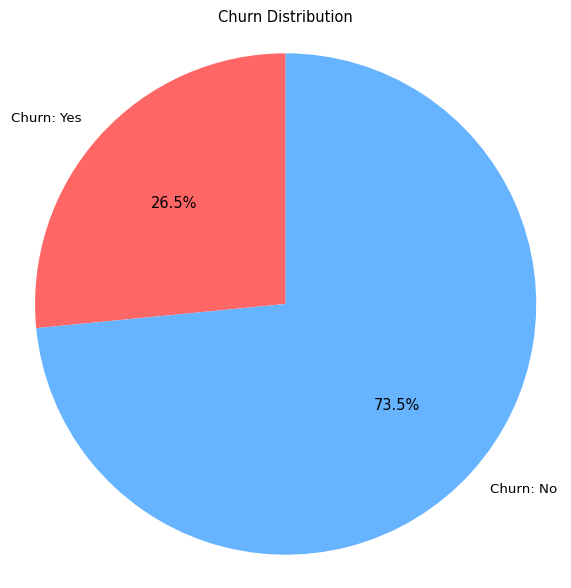

In [17]:
# Visualisation : Répartition du churn par genre
plt.figure(figsize=(6, 6))
labels = ["Churn: Yes", "Churn: No"]
values = [data[data['Churn'] == 'Yes'].shape[0], data[data['Churn'] == 'No'].shape[0]]
plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=90, colors=['#ff6666', '#66b3ff'])
plt.title('Churn Distribution')
plt.axis('equal')
plt.tight_layout()
plt.show()

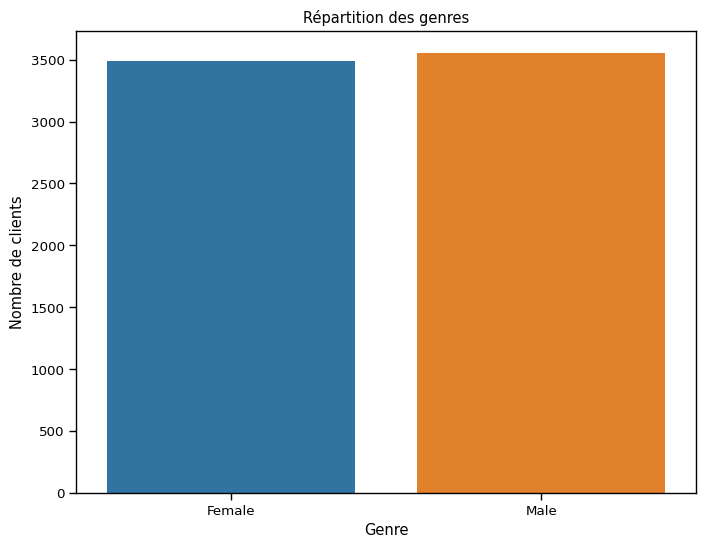

In [18]:
# Visualisation : Diagramme en barres pour la répartition du genre
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='gender')
plt.title('Répartition des genres')
plt.xlabel('Genre')
plt.ylabel('Nombre de clients')
plt.show()

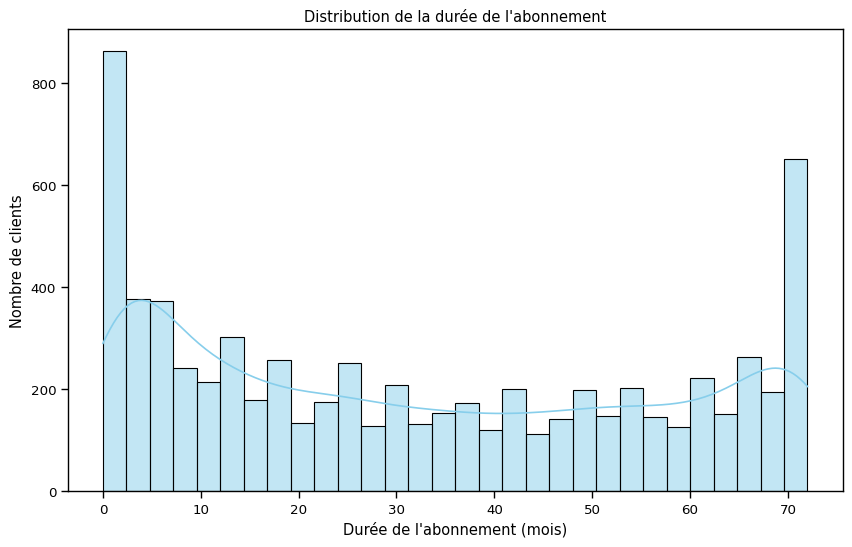

In [19]:
# Visualisation : Histogramme pour la durée de l'abonnement (tenure)
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='tenure', bins=30, kde=True, color='skyblue')
plt.title('Distribution de la durée de l\'abonnement')
plt.xlabel('Durée de l\'abonnement (mois)')
plt.ylabel('Nombre de clients')
plt.show()


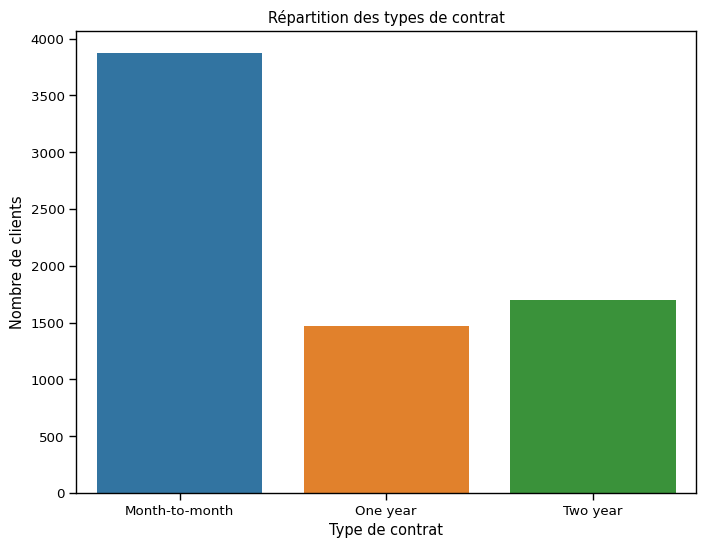

In [20]:
# Visualisation : Diagramme en barres pour le type de contrat (Contract)
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='Contract')
plt.title('Répartition des types de contrat')
plt.xlabel('Type de contrat')
plt.ylabel('Nombre de clients')
plt.show()

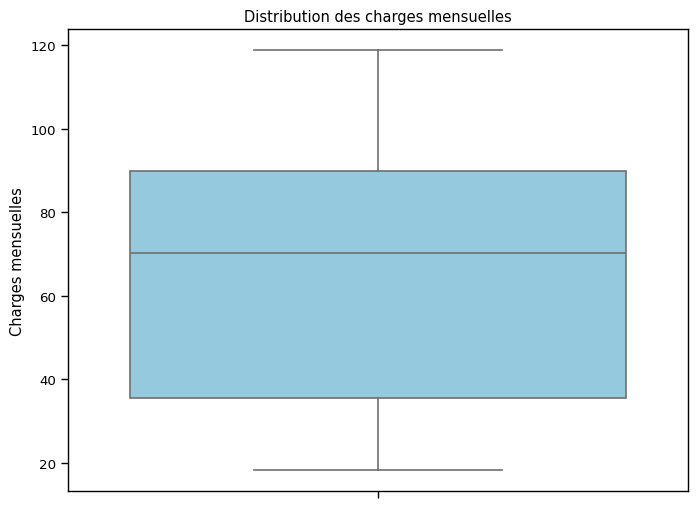

In [21]:
# Visualisation : Diagramme en boîte pour les charges mensuelles (MonthlyCharges)
plt.figure(figsize=(8, 6))
sns.boxplot(data=data, y='MonthlyCharges', color='skyblue')
plt.title('Distribution des charges mensuelles')
plt.ylabel('Charges mensuelles')
plt.show()

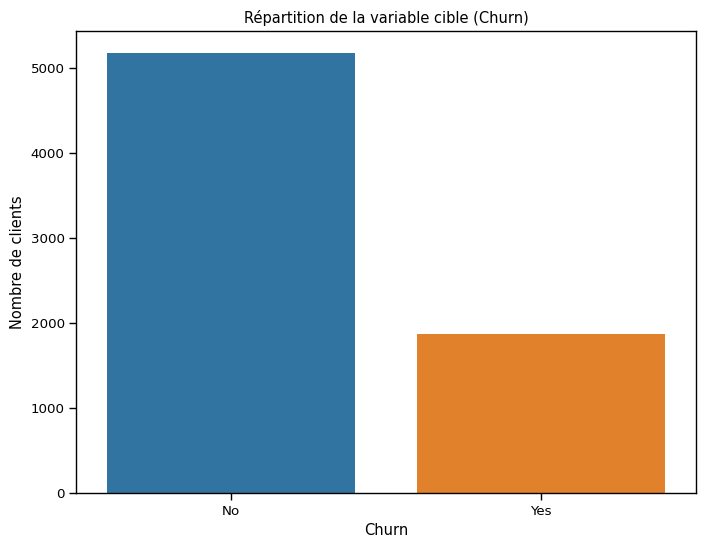

In [22]:
# Visualisation : Diagramme en barres pour la répartition de la variable cible (Churn)
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='Churn')
plt.title('Répartition de la variable cible (Churn)')
plt.xlabel('Churn')
plt.ylabel('Nombre de clients')
plt.show()

### 3.Vérifier la présence de valeurs aberrantes dans le jeu de données.

In [23]:
def detect_outliers_tukey(data):
    # Calculer Q1 (premier quartile) et Q3 (troisième quartile)
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    # Calculer l'écart interquartile (IQR)
    IQR = Q3 - Q1
    # Calculer les limites inférieure et supérieure
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Identifier les valeurs aberrantes
    outliers = (data < lower_bound) | (data > upper_bound)
    return outliers

# Créer un dictionnaire pour stocker les valeurs aberrantes détectées dans chaque colonne
outliers_dict = {}

# Appliquer la méthode de Tukey à chaque colonne numérique
for col in numeric_columns:
    outliers_tukey = detect_outliers_tukey(data[col])
    outliers_dict[col] = data.loc[outliers_tukey, col]

# Afficher les valeurs aberrantes détectées dans chaque colonne
for col, outliers in outliers_dict.items():
    print(f"Valeurs aberrantes détectées avec la méthode de Tukey pour la colonne {col}:")
    print(outliers)
    print("**************************")

Valeurs aberrantes détectées avec la méthode de Tukey pour la colonne SeniorCitizen:
20      1
30      1
31      1
34      1
50      1
       ..
7023    1
7029    1
7031    1
7032    1
7041    1
Name: SeniorCitizen, Length: 1142, dtype: int64
**************************
Valeurs aberrantes détectées avec la méthode de Tukey pour la colonne tenure:
Series([], Name: tenure, dtype: int64)
**************************
Valeurs aberrantes détectées avec la méthode de Tukey pour la colonne MonthlyCharges:
Series([], Name: MonthlyCharges, dtype: float64)
**************************
Valeurs aberrantes détectées avec la méthode de Tukey pour la colonne TotalCharges:
Series([], Name: TotalCharges, dtype: float64)
**************************


selon la fonction de tukey il n y a pas des valeurs aberantes et la resultat fournit au niveau colonne SeniorCitizen est fausse car les valeurs sont binaires 

### 4.Prétraitement des données

#### 4.1 Normalisation des données

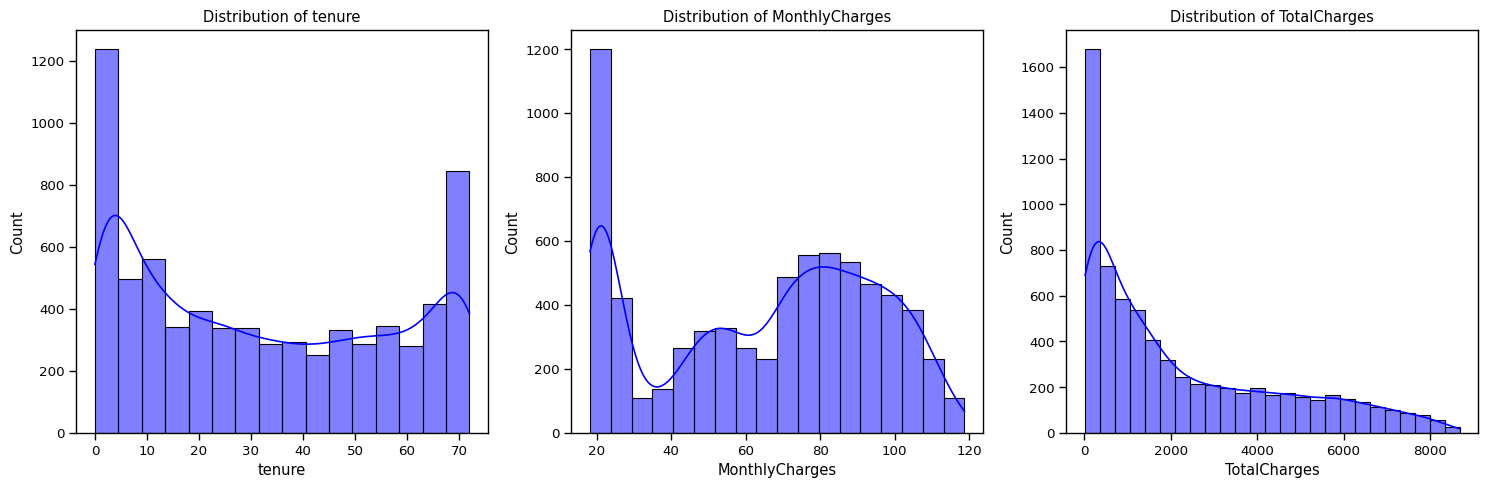

In [24]:
col = ["tenure", 'MonthlyCharges', 'TotalCharges']


# Créer une figure et des sous-tracés
fig, axes = plt.subplots(nrows=1, ncols=len(col), figsize=(15, 5))

# Tracer les graphiques de distribution pour chaque colonne
for i, feature in enumerate(col):
    sns.histplot(data[feature], kde=True, color='blue', ax=axes[i])
    axes[i].set_title(f'Distribution of {feature}')

plt.tight_layout()
plt.show()

        tenure  MonthlyCharges  TotalCharges
0    -1.277445       -1.160323     -0.994194
1     0.066327       -0.259629     -0.173740
2    -1.236724       -0.362660     -0.959649
3     0.514251       -0.746535     -0.195248
4    -1.236724        0.197365     -0.940457
...        ...             ...           ...
7038 -0.340876        0.665992     -0.129180
7039  1.613701        1.277533      2.241056
7040 -0.870241       -1.168632     -0.854514
7041 -1.155283        0.320338     -0.872095
7042  1.369379        1.358961      2.012344

[7043 rows x 3 columns]


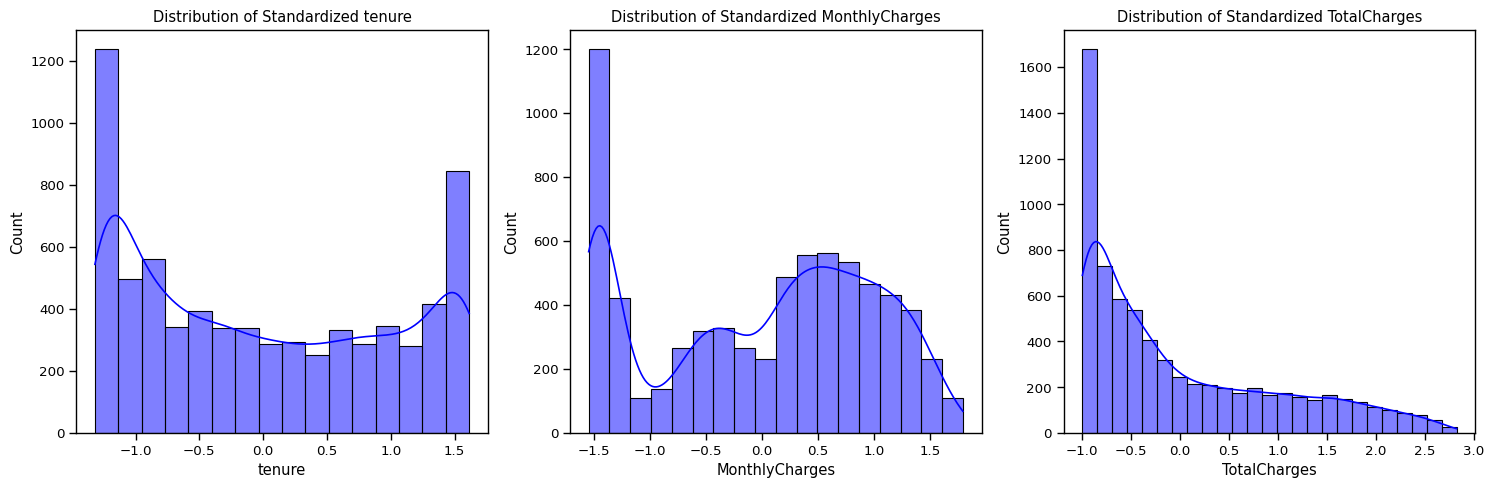

In [25]:
# Standardiser les données
data_std = pd.DataFrame(StandardScaler().fit_transform(data[col]), columns=col)
print(data_std)
# Créer une figure et des sous-tracés
fig, axes = plt.subplots(nrows=1, ncols=len(col), figsize=(15, 5))

# Tracer les graphiques de distribution pour chaque colonne standardisée
for i, feature in enumerate(col):
    sns.histplot(data_std[feature], kde=True, color='blue', ax=axes[i])
    axes[i].set_title(f'Distribution of Standardized {feature}')

plt.tight_layout()
plt.show()

#### 4.2 suppresion des données manquantes

In [26]:
# Supprimer les lignes avec des valeurs nulles dans la colonne "TotalCharges"
data.dropna(subset=['TotalCharges'], inplace=True)


#### 4.3 choisir des variables pertinentes 

In [27]:



def relevant_features(correlation_matrix, threshold):
    relevant_pairs = []
    num_features = len(correlation_matrix.columns)

    # Parcourir chaque paire unique de caractéristiques
    for i in range(num_features):
        for j in range(i + 1, num_features):
            if abs(correlation_matrix.iloc[i, j]) > threshold:
                relevant_pairs.append((correlation_matrix.columns[i], correlation_matrix.columns[j]))

    return relevant_pairs





# Matrice de corrélation des variables numériques
numeric_df = data.select_dtypes(include=['int64', 'float64'])
numeric_corr = numeric_df.corr()

# Encodez les variables catégorielles avec LabelEncoder
label_encoders = {}
for column in data.select_dtypes(include='object'):
    label_encoders[column] = LabelEncoder()
    data[column] = label_encoders[column].fit_transform(data[column])

# Matrice de corrélation des variables catégorielles encodées
categorical_df = data.select_dtypes(include=['int32'])
categorical_corr = categorical_df.corr()

# Concaténer les DataFrames des variables numériques et catégorielles
all_variables_df = pd.concat([numeric_df, categorical_df], axis=1)

# Matrice de corrélation de toutes les variables
all_corr = all_variables_df.corr()



# Utilisation de la fonction avec la matrice de corrélation 'all_corr' et un seuil de 0.4
threshold = 0.4
relevant_pairs = relevant_features(all_corr, threshold)

print("Caractéristiques pertinentes avec une corrélation supérieure à", threshold)
for pair in relevant_pairs:
    print(pair)


Caractéristiques pertinentes avec une corrélation supérieure à 0.4
('tenure', 'TotalCharges')
('tenure', 'Contract')
('MonthlyCharges', 'TotalCharges')
('MonthlyCharges', 'MultipleLines')
('TotalCharges', 'MultipleLines')
('TotalCharges', 'Contract')
('Partner', 'Dependents')
('TechSupport', 'Contract')
('StreamingTV', 'StreamingMovies')


on a le travail de les matrices corrélation dans un fichier 

In [28]:
#les Caractéristiques pertinentes
categorical_cols = ['Partner', 'Contract', 'Dependents', 'TechSupport', 'StreamingMovies', 'StreamingTV']
specific_cols = ["tenure", 'MonthlyCharges', 'TotalCharges']



#### 4.3.1 Encoder les variables catégorielles

In [29]:
label_encoders = {}
for col in categorical_cols:
    label_encoders[col] = LabelEncoder()
    data[col] = label_encoders[col].fit_transform(data[col])

### 5.Machine Learning


In [30]:
# Séparer les features (X) et le label (y)
from imblearn.over_sampling import SMOTE
X = data[categorical_cols+specific_cols]
y = data['Churn']
print(y)
# Appliquer SMOTE aux données d'entraînement et de test
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Diviser les données en ensembles de formation et de test
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7032, dtype: int32


#### Fonction de matrice confusion 

In [40]:
def calculate_confusion_matrix(true_values, predictions):
    return confusion_matrix(true_values, predictions)

# Définir une fonction pour afficher une heatmap de la matrice de confusion
def plot_confusion_matrix(conf_matrix, title):
    plt.figure(figsize=(6, 4))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

#### 5.1 SVC modéle

Rapport de classification SVC:
              precision    recall  f1-score   support

           0       0.82      0.71      0.76      1037
           1       0.74      0.84      0.79      1029

    accuracy                           0.77      2066
   macro avg       0.78      0.77      0.77      2066
weighted avg       0.78      0.77      0.77      2066

*******************************


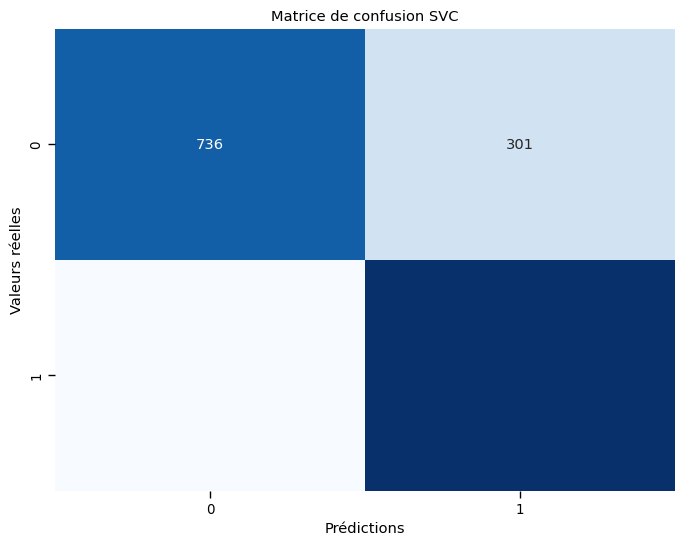

In [38]:
# Define SVC with different kernels
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
best_score = float('-inf')
best_kernel = None

for kernel in kernels:
    svc_classifier = SVC(kernel=kernel)
    scores = cross_val_score(svc_classifier, X_train, y_train, cv=4)
    mean_score = scores.mean()
    if mean_score > best_score:
        best_score = mean_score
        best_kernel = kernel

# Train the best SVC model
best_svc_classifier = SVC(kernel=best_kernel)
best_svc_classifier.fit(X_train, y_train)

# Make predictions
svc_predictions = best_svc_classifier.predict(X_test)

# Afficher le rapport de classification
print("Rapport de classification SVC:")
print(classification_report(y_test, svc_predictions))
print("*******************************")





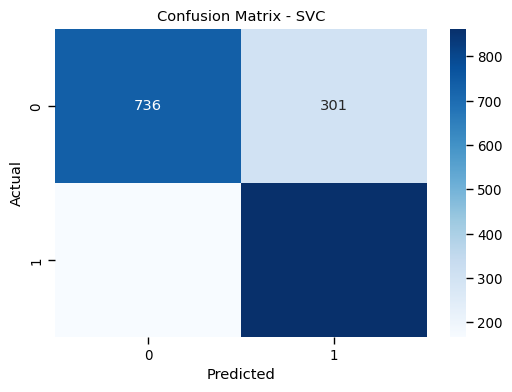

In [42]:
conf_matrix_svc = calculate_confusion_matrix(y_test, svc_predictions)
plot_confusion_matrix(conf_matrix_svc, 'Confusion Matrix - SVC')

#### 5.2 forêt aléatoire

In [43]:
rf_classifier = RandomForestClassifier(n_estimators=200, max_depth=10, min_samples_leaf=4, min_samples_split=2, random_state=42)

# Entraîner le classificateur sur l'ensemble d'entraînement
rf_classifier.fit(X_train, y_train)

# Faire des prédictions sur l'ensemble de test
rf_predictions = rf_classifier.predict(X_test)

# Afficher le rapport de classification
print("Rapport de classification du Random Forest Classifier avec les meilleurs paramètres:")
print(classification_report(y_test, rf_predictions))
print("***************************")

Rapport de classification du Random Forest Classifier avec les meilleurs paramètres:
              precision    recall  f1-score   support

           0       0.85      0.78      0.81      1037
           1       0.79      0.86      0.82      1029

    accuracy                           0.82      2066
   macro avg       0.82      0.82      0.82      2066
weighted avg       0.82      0.82      0.82      2066

***************************


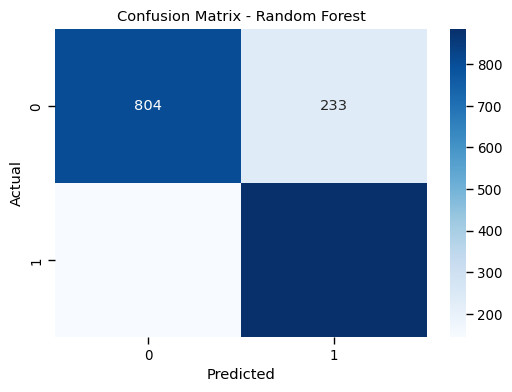

In [44]:
# Pour le modèle Random Forest
conf_matrix_rf = calculate_confusion_matrix(y_test, rf_predictions)
plot_confusion_matrix(conf_matrix_rf, 'Confusion Matrix - Random Forest')

#### 5.3 Grandirnt Boosting

In [45]:
# Définir la grille des hyperparamètres à rechercher pour Gradient Boosting
param_grid_gb = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.5],
    'max_depth': [3, 5, 7]
}

# Initialiser le classificateur Gradient Boosting
gb_classifier = GradientBoostingClassifier()

# Créer un objet GridSearchCV pour Gradient Boosting
grid_search_gb = GridSearchCV(estimator=gb_classifier, param_grid=param_grid_gb, cv=4, scoring='accuracy')

# Effectuer la recherche par grille sur les données d'entraînement pour Gradient Boosting
grid_search_gb.fit(X_train, y_train)

# Afficher les meilleurs hyperparamètres trouvés pour Gradient Boosting
print("Meilleurs paramètres pour Gradient Boosting:", grid_search_gb.best_params_)

# Utiliser le meilleur modèle pour faire des prédictions
best_gb_classifier = grid_search_gb.best_estimator_
best_gb_predictions = best_gb_classifier.predict(X_test)

# Afficher le rapport de classification pour Gradient Boosting
print("Rapport de classification pour Gradient Boosting avec les meilleurs paramètres:")
print(classification_report(y_test, best_gb_predictions))
print("************************************************")

Meilleurs paramètres pour Gradient Boosting: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200}
Rapport de classification pour Gradient Boosting avec les meilleurs paramètres:
              precision    recall  f1-score   support

           0       0.84      0.81      0.82      1037
           1       0.81      0.84      0.83      1029

    accuracy                           0.82      2066
   macro avg       0.82      0.82      0.82      2066
weighted avg       0.82      0.82      0.82      2066

************************************************


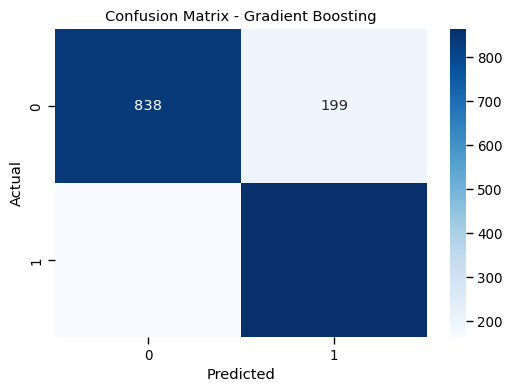

In [46]:
conf_matrix_gb = calculate_confusion_matrix(y_test, best_gb_predictions)
plot_confusion_matrix(conf_matrix_gb, 'Confusion Matrix - Gradient Boosting')

## Deep Learning

vous trouvez la partie de deep dans le fichier test.py